In [1]:
import pandas as pd
from tools.utils import EPIC

In [3]:
epic = pd.read_csv("../data/Additional/EPIC/MethylationEPIC_v-1-0_B4.csv", index_col=0, low_memory=False)

In [3]:
# Differential methylated promotors of genes -> study all covid groups vs healthy controls

In [16]:
dmg_in_cov = pd.read_csv("../DMGInAllStudiesCorrectedTSS.csv", index_col=0)
dmg_in_cov

,UCSC_RefGene_Name,UCSC_RefGene_Group
IlmnID,,
cg18642567,RPGRIP1,TSS1500
cg17515347,AIM2,TSS1500
cg13407664,HTN1,TSS1500
cg21465162,UBQLN1;UBQLN1,TSS200;TSS200
cg22930808,DTX3L,TSS1500
cg25060243,UGT1A4,TSS1500
cg12981595,KRTAP4-8,TSS200
cg21581312,LOC723972,TSS200
cg19556901,SNORD115-1,TSS1500


In [17]:
# Differential methylated promotors of genes -> study non-covid vs covid patients

In [18]:
cov_vs_non_cov = pd.read_csv("output/USANoNCoV_vs_CoV.csv", index_col=0)
cov_vs_non_cov = cov_vs_non_cov[(cov_vs_non_cov["Delta mean"].abs() > 0.1) & (cov_vs_non_cov["q-value"] <= 0.05)].index
print("DMPs [TSS200 | TSS1500]: ", len(cov_vs_non_cov))

cov_vs_non_cov = epic.loc[cov_vs_non_cov, ["UCSC_RefGene_Name", "UCSC_RefGene_Group"]]
display(cov_vs_non_cov)

cov_vs_non_cov.to_csv("../DMGCoV_vs_nonCoVRaw.csv") # Export DM genes covid vs non-covid patients

DMPs [TSS200 | TSS1500]:  26


,UCSC_RefGene_Name,UCSC_RefGene_Group
CpG,,
cg15528722,TTC33,TSS1500
cg24678928,DDX60,TSS1500
cg03607951,IFI44L,TSS1500
cg07815522,PARP9;PARP9;PARP9;PARP9;PARP9;PARP9;DTX3L,5'UTR;5'UTR;5'UTR;5'UTR;5'UTR;5'UTR;TSS1500
cg24103563,TRIM34;TRIM34;TRIM6-TRIM34,TSS1500;5'UTR;Body
cg13304609,IFI44L,TSS1500
cg15452182,LOC101928650;GORAB;GORAB;GORAB,TSS1500;Body;Body;Body
cg17515347,AIM2,TSS1500
cg07863524,OR3A4,TSS200


In [11]:
from venn import venn

In [12]:
# DM genes specific for Covid-19 patients and non-covid-19 patients

In [23]:
cov_non_cov = pd.read_csv("../DMGCoV_vs_nonCoVCorrectedTSS.csv", index_col=0).UCSC_RefGene_Name.str.split(";").explode()
cov_non_hb = pd.read_csv("../DMGInAllStudiesCorrectedTSS.csv", index_col=0).UCSC_RefGene_Name.str.split(";").explode()

<AxesSubplot:>

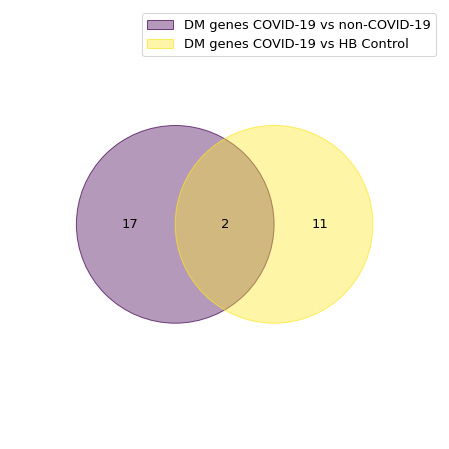

In [26]:
venn({"DM genes COVID-19 vs non-COVID-19": set(cov_non_cov),
     "DM genes COVID-19 vs HB Control": set(cov_non_hb)})

In [12]:
# Intersection

In [27]:
common = pd.DataFrame(set.intersection(set(cov_non_cov), set(cov_non_hb)))
common

,0
0,AIM2
1,DTX3L
